In [699]:
#lets import the file in a dataframe and import other packages

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

driver = pd.read_csv("data_u.csv")

We want to look at structure of data

In [700]:

driver.head()


,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN


In [701]:
# We can also get overall info for the dataset
driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 11 columns):
id                      54681 non-null int64
city_name               54681 non-null object
signup_os               47824 non-null object
signup_channel          54681 non-null object
signup_date             54681 non-null object
bgc_date                32896 non-null object
vehicle_added_date      13134 non-null object
vehicle_make            13223 non-null object
vehicle_model           13223 non-null object
vehicle_year            13223 non-null float64
first_completed_date    6137 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB


We assume conversion rate is the measure of effectiveness, i.e fraction of drivers taking the first trip.

First some basic questions:

    1.) How many drivers ended up completeing the trip out of drivers who signed up for  Uber? 
    2.) What is the perfomace of drivers in various cities. (Perfomace i.e conversion of signed up drivers to 
         actually take a trip)
    
    3.) How is devices impact the conversion rate ?
    4.) How is the conversion of drivers in various signup channels ?
    5.) What is difference between sinup date and vehicle added date and back ground check date , and how useful               it is to predict whether a driver will start driving or not?
    
    
Then we'll dig deeper, with a broader question:

    6.) What factors help determine whether a driver who sign up will take his first trip or not?

We need to convert the datatypes of different dates to datetime from object

In [702]:

# cleaup the date columns, converting the strings to datetime
for col in ['vehicle_added_date', 'signup_date', 'bgc_date', 'first_completed_date']:
    driver.loc[:, col] = pd.to_datetime(driver[col])

In [703]:
# cleanup the categorical columns
for col in ['city_name', 'signup_os', 'signup_channel', 'vehicle_make', 'vehicle_model']:
    driver.loc[:, col] = driver[col].astype('category')

#  We want to know number of drivers who completed the first trip 

In [704]:
# construct target variable
driver.loc[:, 'target'] = 0
driver.loc[~driver['first_completed_date'].isnull(), 'target'] = 1

## Total number of drivers

# fraction of driver who completed first trip 

In [705]:
# fraction of drivers who completed the trip
success_frac = driver['target'].sum()/len(driver)
print(success_frac)

0.11223276823759624


So approximately 11% of Signed up drivers finished their first trip 

In [706]:
# data anomalies, we have success without bgc check or vehicle addition
driver[(driver['bgc_date'].isnull()) | (driver['vehicle_added_date'].isnull())]['target'].sum()


265

# Is someone allowed to drive without a background check

In [707]:
driver.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,target
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaT,0
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT,0
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaT,0
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2016-02-03,1
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,NaT,0


In [708]:
import seaborn as sns

##  Lets visualize the importance of cities and add the dummies variables for the same to dataframe if we think it is important

In [709]:
# analyzing differnt categories for cities
for cat_col in ['city_name', 'signup_os', 'signup_channel', 'vehicle_make', 'vehicle_model']:
    print("Category: " + cat_col)
    for categ in driver[cat_col].cat.categories:
        cat_df = driver[driver[cat_col] == categ]['target']
        num_cases = len(cat_df)
        success_frac = cat_df.sum()/num_cases
        print("Sub-Category: " + str(categ) + " num_cases: " + str(num_cases) + " success_frac: " + str(success_frac))
    print("----------------------")

Category: city_name
Sub-Category: Berton num_cases: 20117 success_frac: 0.12114132325893523
Sub-Category: Strark num_cases: 29557 success_frac: 0.1095848699123727
Sub-Category: Wrouver num_cases: 5007 success_frac: 0.0920711004593569
----------------------
Category: signup_os
Sub-Category: android web num_cases: 14944 success_frac: 0.097296573875803
Sub-Category: ios web num_cases: 16632 success_frac: 0.13173400673400673
Sub-Category: mac num_cases: 5824 success_frac: 0.16277472527472528
Sub-Category: other num_cases: 3648 success_frac: 0.13651315789473684
Sub-Category: windows num_cases: 6776 success_frac: 0.13252656434474616
----------------------
Category: signup_channel
Sub-Category: Organic num_cases: 13427 success_frac: 0.09011692857674834
Sub-Category: Paid num_cases: 23938 success_frac: 0.06190993399615674
Sub-Category: Referral num_cases: 17316 success_frac: 0.19894894894894896
----------------------
Category: vehicle_make
Sub-Category: Acura num_cases: 190 success_frac: 0.468

Lets check distribution of drivers by city

In [710]:
driver['city_name'].value_counts()

Strark     29557
Berton     20117
Wrouver     5007
dtype: int64

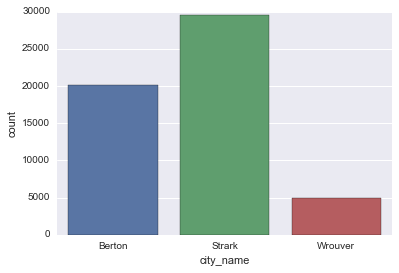

In [711]:

sns.countplot(x="city_name", data=driver)

We can see most number of drivers are from Strank city 

Now lets separate the city drivers by driver who completed trip vs who did not 

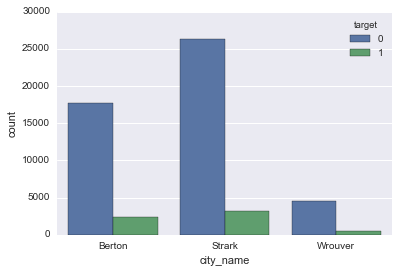

In [428]:
sns.countplot(x="city_name", data=driver, hue = 'target');

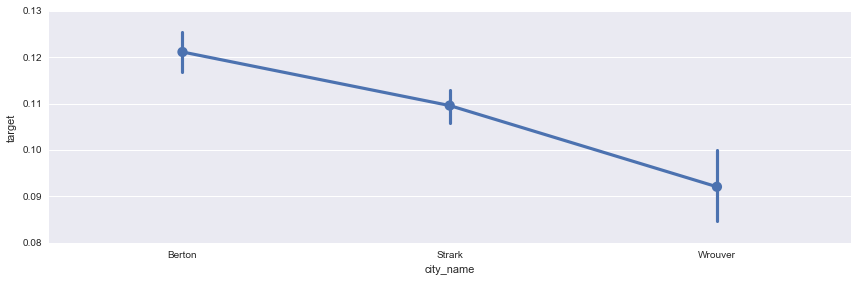

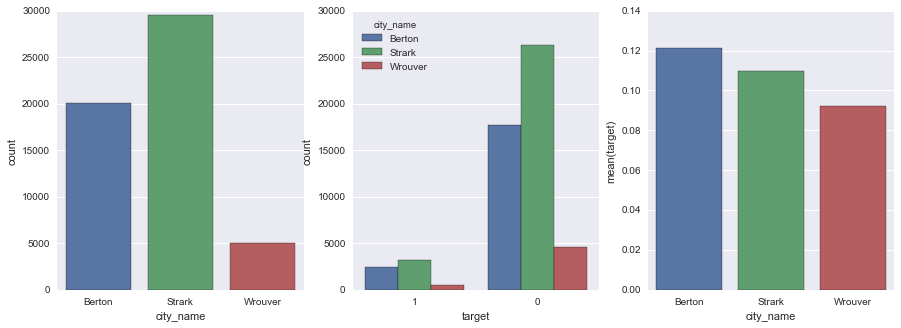

In [712]:
sns.factorplot('city_name','target', data=driver,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='city_name', data=driver, ax=axis1)
sns.countplot(x='target', hue="city_name", data=driver, order=[1,0], ax=axis2)

# group by signup_os, and get the mean for complete_trip_flag for each value in signup_os
city_perc = driver[["city_name", "target"]].groupby(['city_name'],as_index=False).mean()
sns.barplot(x='city_name', y='target', data = city_perc)

#lets add dummy columns for the  to driver dataframe and drop the signup_os column
city_dummies_driver  = pd.get_dummies(driver['city_name'])

driver = driver.join(city_dummies_driver)
driver.drop(['city_name'], axis=1,inplace=True)

## Lets visualize the importance of the signup_os and convert it to dummy variable

In [376]:
#how many different types of OS do our drivers using
len(driver['signup_os'].unique())


6

In [402]:
#what all are the different OS that drivers using
driver['signup_os'].unique()

[ios web, windows, android web, NaN, mac, other]
Categories (5, object): [ios web, windows, android web, mac, other]

Lets look at the number of drivers who have using different os

In [403]:
driver['signup_os'].value_counts()

ios web        16632
android web    14944
windows         6776
mac             5824
other           3648
dtype: int64

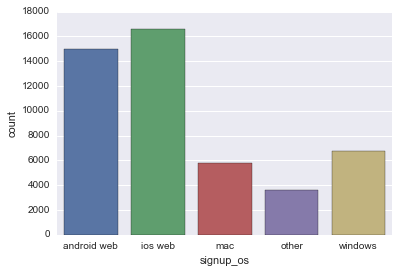

In [404]:
#what is the frequency of drivers in different Os
sns.countplot(x="signup_os", data=driver);

Lets look at the performance of different OS

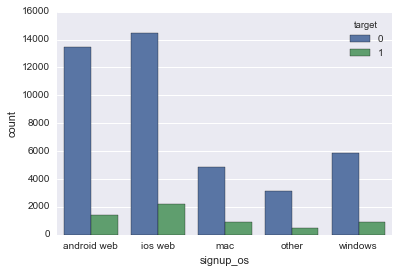

In [405]:
sns.countplot(x="signup_os", data=driver, hue = 'target');

In [424]:
#lets calculate the fraction of drivers who completed trips on each os platform
os_complete_trip = driver.pivot_table(index="signup_os",values="target", aggfunc=np.mean)
print(os_complete_trip)

signup_os
android web    0.097297
ios web        0.131734
mac            0.162775
other          0.136513
windows        0.132527
Name: target, dtype: float64


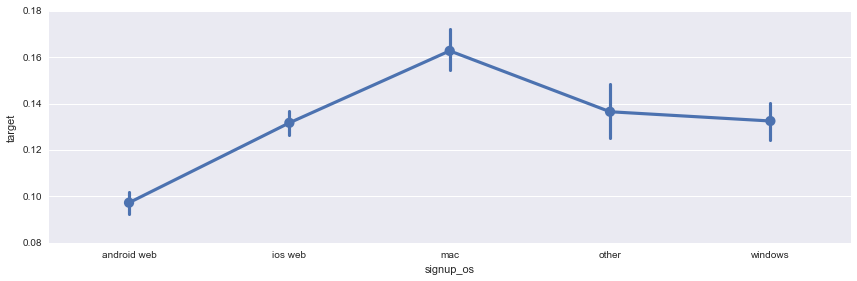

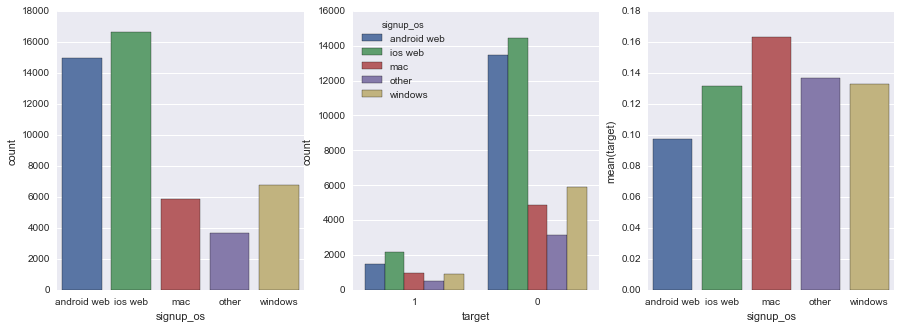

In [713]:
sns.factorplot('signup_os','target', data=driver,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='signup_os', data=driver, ax=axis1)
sns.countplot(x='target', hue="signup_os", data=driver, order=[1,0], ax=axis2)

# group by signup_os, and get the mean for complete_trip_flag for each value in signup_os
os_perc = driver[["signup_os", "target"]].groupby(['signup_os'],as_index=False).mean()
sns.barplot(x='signup_os', y='target', data=os_perc)

#lets add dummy columns for the  to driver dataframe and drop the signup_os column
os_dummies_driver  = pd.get_dummies(driver['signup_os'])

driver = driver.join(os_dummies_driver)
driver.drop(['signup_os'], axis=1,inplace=True)

### Looks like macbook conversion is very good and conversion on android is worse. On average conversion rate in mac is 5% higher than the average.

## Lets visualize the importance of signup_channel and add the dummies variables for the same to dataframe  

In [409]:
driver['signup_channel'].value_counts()

Paid        23938
Referral    17316
Organic     13427
dtype: int64

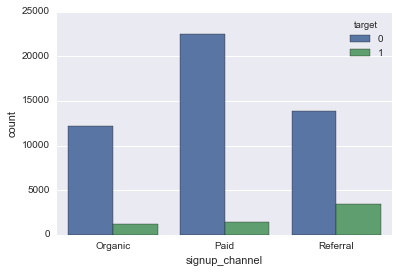

In [410]:
sns.countplot(x="signup_channel", data=driver, hue = 'target');

In [411]:
#lets calculate the fraction of drivers who completed trips on each channel 
channel_complete_trip = driver.pivot_table(index="signup_channel",values="target", aggfunc=np.mean)
print(channel_complete_trip)

signup_channel
Organic     0.090117
Paid        0.061910
Referral    0.198949
Name: target, dtype: float64


* Looks like Referral channel conversion is best which is what we expected as well, vs in paid channel conversion is lower than organic which is surprising

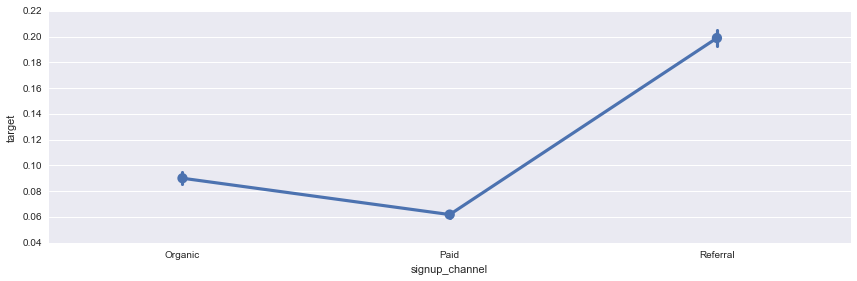

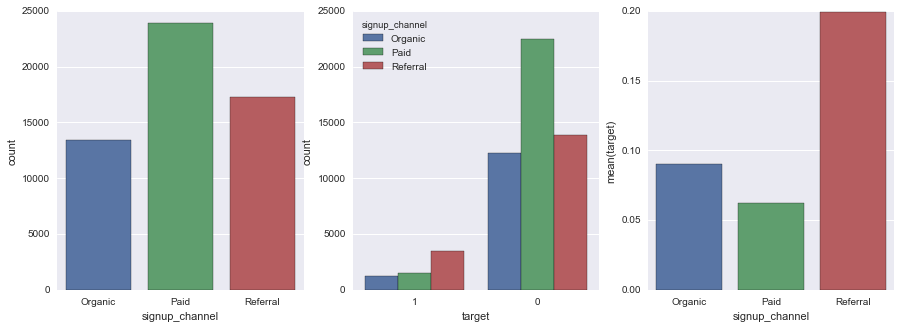

In [714]:
sns.factorplot('signup_channel','target', data=driver,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='signup_channel', data=driver, ax=axis1)
sns.countplot(x='target', hue="signup_channel", data=driver, order=[1,0], ax=axis2)

# group by signup_os, and get the mean for complete_trip_flag for each value in signup_os
channel_perc = driver[["signup_channel", "target"]].groupby(['signup_channel'],as_index=False).mean()
sns.barplot(x='signup_channel', y='target', data = channel_perc)

#lets add dummy columns for the  to driver dataframe and drop the signup_os column
channel_dummies_driver  = pd.get_dummies(driver['signup_channel'])

driver = driver.join(channel_dummies_driver)
driver.drop(['signup_channel'], axis=1,inplace=True)


## What is difference between sinup date and vehicle added date and back ground check date , and how useful               it is to predict whether a driver will start driving or not?


#### I believe looking at the conversion funnel  can provide some great insights about where we are loosing these drivers.

In [414]:
def not_null_count(column):
    column_null = pd.isnull(column)
    null = column[column_null == False]
    return len(null)

column_not_null_count = driver.apply(not_null_count)
print(column_not_null_count)

id                      54681
city_name               54681
signup_os               47824
signup_channel          54681
signup_date             54681
bgc_date                32896
vehicle_added_date      13134
vehicle_make            13223
vehicle_model           13223
vehicle_year            13223
first_completed_date     6137
target                  54681
dtype: int64


##### So as we can see that we  almost almost 40% doesn't turn in the background check forms and  those who gave the background check form 60% doesn't add vehicles so there might be something wrong at the background check step

###### check if background_check predicts target

In [415]:


driver['target'].corr(~driver['bgc_date'].isnull())


0.28934602318676839

### It does!

##### check if vehicle being added predicts target

In [435]:

driver['target'].corr(~driver['vehicle_added_date'].isnull())


0.59644589633493639

### It does!

###### check eagerness of drivers, time taken between signup and bgc check

In [422]:

bgc_df = driver[~driver['bgc_date'].isnull()]
(bgc_df['bgc_date'] - bgc_df['signup_date']).apply(lambda x: x.days).corr(bgc_df['target'])


-0.30567552073346776

##### Negatively correlated! this means more eager drivers get their background checks done pretty soon after signup

In [430]:
# check eagerness of drivers, time taken between signup and vehicle addition

In [432]:


va_df = driver[(~driver['vehicle_added_date'].isnull())]
(va_df['vehicle_added_date'] - va_df['signup_date']).apply(lambda x: x.days).corr(va_df['target'])


-0.58662637218132641

#### Negatively correlated! this means that the eagerness intuition holds - we can use both of these as indicators

In [715]:
# construct background check flag variable
driver.loc[:, 'bgc_flag'] = 0
driver.loc[~driver['bgc_date'].isnull(), 'bgc_flag'] = 1

In [716]:
# construct vehicle add check flag variable
driver.loc[:, 'vehicle_add'] = 0
driver.loc[~driver['vehicle_added_date'].isnull(), 'vehicle_add'] = 1

###### We want to caculate the delta between the signup_date to bgc_date and vehicle_added_date 

In [717]:
driver['signup_to_bgc'] = driver['bgc_date'] - driver['signup_date']
driver['signup_to_veh'] = driver['vehicle_added_date'] - driver['signup_date'] 

In [718]:
driver.head()

,id,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,target,Berton,...,mac,other,windows,Organic,Paid,Referral,bgc_flag,vehicle_add,signup_to_bgc,signup_to_veh
0,1,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaT,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,NaT,NaT
1,2,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0,0,NaT,NaT
2,3,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaT,0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0 days,NaT
3,4,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2016-02-03,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,5 days,5 days
4,5,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,NaT,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,15 days,16 days


We see a lot of missing values in these columns , lets replace these values with median of the columns.

In [719]:
driver["signup_to_bgc"] = driver["signup_to_bgc"].fillna(driver["signup_to_bgc"].median())
driver['signup_to_veh'] = driver["signup_to_veh"].fillna(driver["signup_to_veh"].median())

# Check if vehicle year predicts target



In [720]:
year_df = driver[~driver['vehicle_year'].isnull()]
year_df['vehicle_year'].corr(year_df['target'])

0.022391126767244918

### Not really predictive older cars equally likely to be used as newer cars

In [721]:
#lets convert the signup_to_bgc and bgc_to_veh to integer
driver['signup_to_bgc'] = (driver['signup_to_bgc'] / np.timedelta64(1, 'D')).astype(int)
driver['signup_to_veh'] = (driver['signup_to_veh'] / np.timedelta64(1, 'D')).astype(int)

In [722]:
driver.head()

,id,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,target,Berton,...,mac,other,windows,Organic,Paid,Referral,bgc_flag,vehicle_add,signup_to_bgc,signup_to_veh
0,1,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaT,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,6,11
1,2,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0,0,6,11
2,3,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaT,0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,11
3,4,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2016-02-03,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,5,5
4,5,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,NaT,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,15,16


In [723]:
uber = driver

# Lets delete vehicle_added_date , bgc_date , signup_date, vehicle_year,vehicle_make  from the dataframe

In [453]:
driver.drop(['vehicle_added_date', 'bgc_date','signup_date','vehicle_year','vehicle_make'], axis=1,inplace=True)

Vehicle Model column have lot of null values and don't seem useful for prediction of conversion of signed up drivers to first trip so lets drop them


In [455]:
driver.drop(['vehicle_model'], axis=1,inplace=True)

In [466]:
# lets drop id column and first_completed_Dae as well
driver.drop(['id','first_completed_date'], axis=1,inplace=True)

In [467]:
driver.head()

,target,android web,ios web,mac,other,windows,Organic,Paid,Referral,Berton,Strark,Wrouver,bgc_flag,vehicle_add,signup_to_bgc,signup_to_veh
0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,6,11
1,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,6,11
2,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0,11
3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,5,5
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,15,16


In [458]:
driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 18 columns):
id                      54681 non-null int64
first_completed_date    6137 non-null datetime64[ns]
target                  54681 non-null int64
android web             54681 non-null float64
ios web                 54681 non-null float64
mac                     54681 non-null float64
other                   54681 non-null float64
windows                 54681 non-null float64
Organic                 54681 non-null float64
Paid                    54681 non-null float64
Referral                54681 non-null float64
Berton                  54681 non-null float64
Strark                  54681 non-null float64
Wrouver                 54681 non-null float64
bgc_flag                54681 non-null int64
vehicle_add             54681 non-null int64
signup_to_bgc           54681 non-null int64
signup_to_veh           54681 non-null int64
dtypes: datetime64[ns](1), float64(11), int64(6)
me

In [463]:
driver.describe()

,id,target,android web,ios web,mac,other,windows,Organic,Paid,Referral,Berton,Strark,Wrouver,bgc_flag,vehicle_add,signup_to_bgc,signup_to_veh
count,54681.000000,54681.000000,54681.000000,54681.000000,54681.000000,54681.000000,54681.000000,54681.000000,54681.000000,54681.000000,54681.000000,54681.000000,54681.000000,54681.000000,54681.000000,54681.000000,54681.000000
mean,27341.000000,0.112233,0.273294,0.304164,0.106509,0.066714,0.123919,0.245551,0.437775,0.316673,0.367897,0.540535,0.091567,0.601598,0.240193,8.434392,12.009583
std,15785.189372,0.315656,0.445655,0.460057,0.308490,0.249529,0.329492,0.430418,0.496118,0.465183,0.482238,0.498359,0.288417,0.489573,0.427205,8.396318,7.122901
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000
25%,13671.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,11.000000
50%,27341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,6.000000,11.000000
75%,41011.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,9.000000,11.000000
max,54681.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69.000000,72.000000


# Predictive Model to figure out the probability whether a drive signup will start driving or not

In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

In [485]:
from sklearn.cross_validation import train_test_split 
from sklearn import metrics

In [623]:
X = driver.drop("target",axis=1)
Y = driver["target"]

In [624]:
X.head()

,android web,ios web,mac,other,windows,Organic,Paid,Referral,Berton,Strark,Wrouver,bgc_flag,vehicle_add,signup_to_bgc,signup_to_veh
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,6,11
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,6,11
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0,11
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,5,5
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,15,16


In [625]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [626]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


## Since we are trying to predict whether a driver who sign up will actually start driving or not, it is a classification problem so lets use logistic regression since all the variables are in numeric form now.

In [627]:
# Logistic Regression

model_1 = LogisticRegression()

model_1.fit(X_train, y_train)


model_1.score(X_train, y_train)

0.94312362838332109

### Looks like our model is giving us a 94% of mean accuracy on our training dataset.Lets evauate the performance at the test dataset

In [628]:
Y_pred = model_1.predict(X_test)
print (Y_pred)


[0 0 0 ..., 0 0 0]


In [629]:
probs_1 = model_1.predict_proba(X_test)
print(probs_1)

[[  9.87582532e-01   1.24174677e-02]
 [  9.99758879e-01   2.41121109e-04]
 [  9.89941292e-01   1.00587076e-02]
 ..., 
 [  9.99658715e-01   3.41285388e-04]
 [  9.93667758e-01   6.33224153e-03]
 [  9.91447994e-01   8.55200618e-03]]


In [630]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model_1.coef_))))

,0,1
0,android web,[0.496030626523]
1,ios web,[0.584401296941]
2,mac,[0.943375811681]
3,other,[0.7949053048]
4,windows,[0.869094430301]
5,Organic,[-1.4125758459]
6,Paid,[-1.63991280273]
7,Referral,[-0.968953168092]
8,Berton,[-1.24628144762]
9,Strark,[-1.35628803018]


* So both bgc_flag and vehicle_add flag increase the chances of a driver actually making the first trip.
* However other variables does not seem to impact the outcome that much

#### As you can see, the classifier is predicting a 0 for target variable since probability in the second column is less thean 0.5.
#### Now let's generate some evaluation metrics

In [631]:

print (metrics.accuracy_score(y_test, Y_pred))
print (metrics.roc_auc_score(y_test, probs_1[:, 1]))

0.944346235904
0.970119888995


* The accuracy is 94%, which is the same as we experienced when training and predicting on the same data.
* We can also see the confusion matrix and a classification report with other metrics.

In [632]:
print (metrics.confusion_matrix(y_test, Y_pred))
print (metrics.classification_report(y_test, Y_pred))

[[14060   486]
 [  427  1432]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97     14546
          1       0.75      0.77      0.76      1859

avg / total       0.95      0.94      0.94     16405



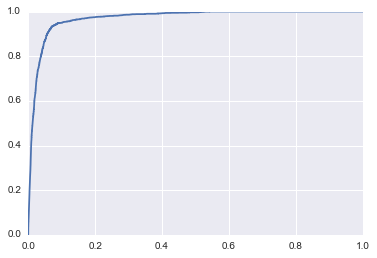

In [633]:
## we can look at the curver of the FPR values on the x-axis and the TPR values on the y-axis.

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs_1[:, 1])
plt.plot(fpr, tpr)

## Looks like our model is performing very well since auc score is also very close to 1. Precision is also 0.95 and recall of model is also 0.95. 

## If we observe the data closely and also the results it seems like bgc_flag and vehicle_add flag impacting the outcome largely . Even if we dont use any model we can say that both flag will decide the outcome of target variable and thus knowing the value of these flag will stop as from actually building any true predictive model. Thus we need to  remove these features from our model .


In [635]:
X.drop(['bgc_flag','vehicle_add'], axis=1,inplace=True)

In [642]:
X.head()

,android web,ios web,mac,other,windows,Organic,Paid,Referral,Berton,Strark,Wrouver,signup_to_bgc,signup_to_veh
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6,11
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6,11
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,11
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5,5
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,15,16


In [643]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [644]:
# Logistic Regression

model_2 = LogisticRegression()

model_2.fit(X_train, y_train)


model_2.score(X_train, y_train)

0.93081826732155926

### Now our model is giving us an accuracy of 93% on training dataset lets evaluate the performance on the test dataset.

In [729]:
Y_pred = model_2.predict(X_test)
print (Y_pred)


[0 0 0 ..., 0 0 0]


In [646]:
probs_2 = model_2.predict_proba(X_test)
print(probs_2)

[[ 0.94592048  0.05407952]
 [ 0.97069807  0.02930193]
 [ 0.97916654  0.02083346]
 ..., 
 [ 0.97317133  0.02682867]
 [ 0.99570779  0.00429221]
 [ 0.97340277  0.02659723]]


In [647]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model_1.coef_))))

,0,1
0,android web,[0.496030626523]
1,ios web,[0.584401296941]
2,mac,[0.943375811681]
3,other,[0.7949053048]
4,windows,[0.869094430301]
5,Organic,[-1.4125758459]
6,Paid,[-1.63991280273]
7,Referral,[-0.968953168092]
8,Berton,[-1.24628144762]
9,Strark,[-1.35628803018]


([<matplotlib.axis.XTick at 0x126e1c940>,
 <a list of 13 Text xticklabel objects>)

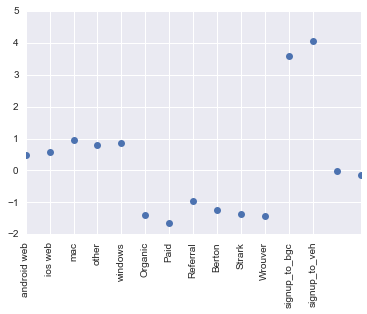

In [648]:
plt.plot(np.transpose(model_1.coef_), 'o')
plt.xticks(range(X.shape[1]), X_train.columns,rotation=90)

In [731]:

print (metrics.accuracy_score(y_test, Y_pred))
print (metrics.roc_auc_score(y_test, probs_1[:, 1]))

0.931240475465
0.970119888995


* The accuracy is 93%, which is the same as we experienced when training and predicting on the same data.
* ROC score is 0.85 which is a good indicator of predictive power of our model.
* We can also see the confusion matrix and a classification report with other metrics.

In [652]:
print (metrics.confusion_matrix(y_test, Y_pred))
print (metrics.classification_report(y_test, Y_pred))

[[14346   200]
 [  928   931]]
             precision    recall  f1-score   support

          0       0.94      0.99      0.96     14546
          1       0.82      0.50      0.62      1859

avg / total       0.93      0.93      0.92     16405



* We can see that value of both precision and recall is also high so model has good predictive power.
* We can look at the graph  of the FPR values on the x-axis and the TPR values on the y-axis.


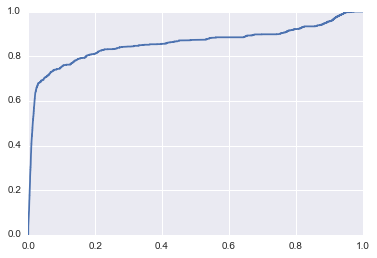

In [579]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:, 1])
plt.plot(fpr, tpr)

## Model Evaluation Using Cross-Validation

We might be getting higher accuracy because of overfitting of data. Now let's try 5-fold cross-validation, to see if the accuracy holds up more rigorously.

In [653]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

In [654]:
# evaluate the model using 5-fold cross-validation


kf = KFold(len(X), 5, shuffle=True, random_state=0)
model_3 = LogisticRegression()

accuracies = cross_val_score(model_2,X, Y, scoring="accuracy", cv=kf)

print (accuracies)
print (accuracies.mean())

[ 0.9316083   0.9326079   0.93443672  0.92968178  0.92730432]
0.931127805261


## Our model is performing good even using the cross validation, and accuaracy is still 93 %

## We might want to consider regularization, given that some of our features are correlated to each other .
 * We will first perform the l2 legularization and then we will perform the l1 regularization

In [662]:
#Logit regression will simply classify the data set using l2 regularization:

model_4 = LogisticRegression(C=1, penalty='l2').fit(X_train, y_train)
model_4.score(X_train, y_train)


0.93081826732155926

In [663]:
Y_pred = model_4.predict(X_test)
print (Y_pred)

[0 0 0 ..., 0 0 0]


In [664]:
probs_4 = model_4.predict_proba(X_test)
print(probs_4)

[[ 0.94592048  0.05407952]
 [ 0.97069807  0.02930193]
 [ 0.97916654  0.02083346]
 ..., 
 [ 0.97317133  0.02682867]
 [ 0.99570779  0.00429221]
 [ 0.97340277  0.02659723]]


In [665]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model_4.coef_))))


,0,1
0,android web,[1.72668939058]
1,ios web,[1.92177556413]
2,mac,[2.30570328551]
3,other,[2.12842838851]
4,windows,[2.17728591717]
5,Organic,[-0.234358443908]
6,Paid,[-0.784645958484]
7,Referral,[0.687821851572]
8,Berton,[-0.0487392698571]
9,Strark,[-0.0702094232653]


In [666]:
print (metrics.roc_auc_score(y_test, probs_4[:, 1]))

0.857833197379


### Looks like  after  l2 regularization also predictive power remains the same. 

In [667]:
#Logit regression will simply classify the data set using l2 regularization:

model_5 = LogisticRegression(C=1, penalty='l1').fit(X_train, y_train)
model_5.score(X_train, y_train)


0.93084439335353741

In [668]:
Y_pred = model_5.predict(X_test)
print (Y_pred)
probs_5 = model_5.predict_proba(X_test)
print(probs_5)

[0 0 0 ..., 0 0 0]
[[ 0.94597716  0.05402284]
 [ 0.97062586  0.02937414]
 [ 0.98028233  0.01971767]
 ..., 
 [ 0.97461927  0.02538073]
 [ 0.99567498  0.00432502]
 [ 0.97341855  0.02658145]]


In [669]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model_5.coef_))))

,0,1
0,android web,[1.78770417216]
1,ios web,[1.98252043257]
2,mac,[2.36996538278]
3,other,[2.19465302728]
4,windows,[2.24133874273]
5,Organic,[0.524000735114]
6,Paid,[-0.0259580407483]
7,Referral,[1.45164520326]
8,Berton,[0.130902572275]
9,Strark,[0.110205716767]


In [671]:
print (metrics.roc_auc_score(y_test, probs_5[:, 1]))

0.857929661957


#### After l1 Regularization auc score incrased by 1 basis point although now referral feature has more predictive power , which is what we expect

# Lets try Decision trees
### Decision trees will give more accurate result since it calculates the score from eah feature multiple times
### Pre-prunning has been applied here to avoid over fitting

In [677]:
from sklearn.tree import DecisionTreeClassifier

In [741]:

dtree = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, y_train)
dtree.score(X_train, y_train)


0.94103354582506005

### Accuracy score on Train data is 0.94

In [ ]:
dtree.score(X_train, y_train)

In [684]:
Y_pred =  dtree.predict(X_test)
test_auc = roc_auc_score(X_test, Y_pred)

In [685]:
test_auc

0.86390367979543969

In [686]:
Y_pred =  dtree.predict(X_train)
train_auc = roc_auc_score(y_train, Y_pred)

In [687]:
train_auc

0.8642278919082802

### Both train and test roc_auc_score are same which shows that there is less variance and which is a good measure of less overfitting

In [689]:
probs_tree = dtree.predict_proba(X_test)

In [690]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [725]:
probs_tree

array([[ 0.97345291,  0.02654709],
       [ 0.99471615,  0.00528385],
       [ 0.99471615,  0.00528385],
       ..., 
       [ 0.99471615,  0.00528385],
       [ 0.67188264,  0.32811736],
       [ 0.99471615,  0.00528385]])

In [726]:
print (metrics.accuracy_score(y_test, Y_pred))

0.937884791222


## Accuracy score is 93% 

Feature Importance in Decision trees: 


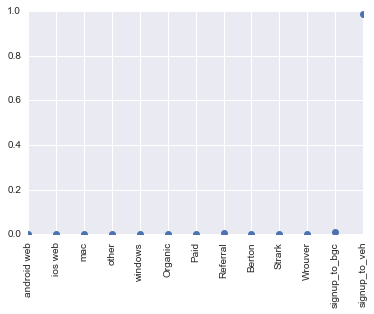

In [693]:
plt.plot(dtree.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
print ('Feature Importance in Decision trees: ')

## Since predictive power is same in both the models however auc score of Decision Tree is higher we Should use Decision Tree Model.


# Caveats and learning

> I also applied the random forest classifier and decison tree classifiers , however none of them providd substantial increment in predictive power or auc_score. Hence it is better to use decision tree over a black box ensemble method.

> I would love to have data for more than one month to look for a seasonality impact as well. 

> Data points regardig the referral type might be helpful (Whether customer referred the driver or another driver)

> Also information regarding some promotions on competetiors platform can help to predict the outcome better

# Insights:

> Referral channel is perfoming the best where as paid channel performance is not good,so it might make sense to give more budget to the Referral programs and give more referral bonuses as compare to spending money on paid channels

> More the delay between the signup date and background check date and vehicle add date lesser the chances of driver actually making he trip, we see a lot of drop in volume from background check to vehicle add . We should reevaluate our  background check process to see if its acting as hindrance for drivers to come on board. 


In [745]:
import os
os.environ['PATH']

'/Users/shobhit/anaconda/bin:/Users/shobhit/Documents/python/anaconda/bin:/Users/shobhit/anaconda/bin:/Users/shobhit/Documents/python/anaconda/bin:/Users/shobhit/anaconda/bin:/Library/Frameworks/Python.framework/Versions/3.4/bin:/Library/Frameworks/Python.framework/Versions/3.4/bin:/Library/Frameworks/Python.framework/Versions/3.4/bin:/Library/Frameworks/Python.framework/Versions/3.4/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin:/usr/local/git/bin'